<a href="https://colab.research.google.com/github/NARAEIM/tp2-da/blob/imnarae/tp2_da_imnarae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings(action='ignore')


In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# click_stream_df

**<click_stream_new 컬럼안내><p>**
session_id: 세션 아이디 <br>
event_name: 사건의 이름<br>
event_time: 사건이 일어난 시간<br>
event_id: 사건 아이디<br>
traffic_source: 접속 방법<br>
product_id: 물건 아이디<br>
quantitiy: 물건 개수<br>
item_price: 물건 가격<br>
payment_status: 결제 상태<br>
search_keywords: 검색 키워드<br>
promo_code: 프로모션 코드<br>
promo_amount: 프로모션을 통한 할인 가격

In [98]:
click_df = pd.read_csv('/content/drive/MyDrive/Colab/tp2/click_stream_new.csv')
click_df.head()

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,15315.00,4.00,313529.00,NaN,NaN,NaN,NaN
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN


In [99]:
click_df.columns


Index(['                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 session_id',
       'event_name', 'event_time', 'event_id', 'traffic_source', 'product_id',
       'quantity', 'item_price', 'payment_status', 'search_keywords',
       'promo_code', 'promo_amount'],
      dtype='object')

In [100]:
#컬럼명 공백제거
click_df.columns = click_df.columns.str.strip()


In [101]:
click_df['event_name'].unique()

array(['HOMEPAGE', 'SCROLL', 'ADD_TO_CART', 'BOOKING', 'SEARCH',
       'ITEM_DETAIL', 'ADD_PROMO', 'CLICK', 'PROMO_PAGE', nan],
      dtype=object)

In [102]:
click_df['promo_code'].value_counts()


AZ2022           5269
WEEKENDSERU      4001
BUYMORE          3860
XX2022           2560
WEEKENDMANTAP    1296
LIBURDONG        1294
STARTUP           690
SC2022            678
Name: promo_code, dtype: int64

In [103]:
click_df['promo_code'].isna().sum()

725940

# customer_df

**<customer 컬럼 안내><p>**
customer_id: 고객 아이디 <br>
first_name: 이름<br>
last_name: 성<br>
username: 유저 이름<br>
email: 이메일<br>
gender: 성별<br>
birthdate: 생일<br>
device_type: 기기 종류<br>
device_id: 장치 아이디<br>
device_version: 디바이스 버전<br>
home_location_lat: 집 위도<br>
home_location_long: 집 경도<br>
home_location: 집 위치<br>
home_country: 나라<br>
first_join_date: 처음 가입한 날짜


In [104]:
customer_df = pd.read_csv('/content/drive/MyDrive/Colab/tp2/customer.csv')
customer_df.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.04,101.36,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.21,106.82,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.30,115.77,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.98,114.92,Kalimantan Selatan,Indonesia,2021-04-11


In [105]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [106]:
customer_df['customer_id'].nunique()

100000

#transaction_df

**< transaction_df 컬럼 안내 >**<p>
created_at: 거래 발생 시간<br>
customer_id: 주문고객의 고유 식별자<br>
booking_id: 각 주문에 할당된 고유 식별자(한 고객이 여러 상품을 주문한 경우에도 각 주문은 별도의 booking_id를 가짐)<br>
session_id: 고객의 웹사이트 방문 세션(여러 주문이 같은 세션에서 발생했다면,  고객이 한 번의 웹사이트 방문 중에 여러 상품을 구매한 것)<br>
payment_method: 고객의 결제방법 (신용카드,  PayPal 등)<br>
payment_status: 결제 상태<br>
promo_amount: 주문에서 사용된 프로모션 또는 할인액<br>
promo_code: 사용한 프로모션 코드<br>
shipment_fee: 배송비<br>
shipment_date_limit: 상품이 배송되어야 하는 최종 날짜<br>
shipment_location_lat, shipment_location_long: 배송지의 위도와 경도<br>
total_amount: 주문 총 금액<br>
product_id: 주문된 제품의 고유 식별자<br>
quantity: 주문된 제품 수량<br>
item_price: 각 개별 제품 가격

In [107]:
transaction_df = pd.read_csv('/content/drive/MyDrive/Colab/tp2/transaction_new.csv')
transaction_df.head(3)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.23,111.97,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.01,107.80,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.58,115.74,550696,53686,4,135174


In [108]:
transaction_df['booking_id'].value_counts()

In [ ]:
transaction_df['promo_code'].value_counts()

In [ ]:
transaction_df['payment_status'].value_counts()

# product_df(상품 카테코리 별 매출 비중 확인(Product 관점))

**< product_df 컬럼 안내 >**<p>
id : 제품의 고유id (transaction 데이터의 product_id 와 연결) <br>
gender : 제품의 타겟 성별<br>
masterCategory : 주 카테고리<br>
subCategory	: 부 카테고리<br>
articleType	: 세부유형(바지 중에서도 "청바지,슬랙스.." 이런식의 세부유형)<br>
baseColour	: 제품의 기본 색상<br>
season	: 출시 또는 판매 계절<br>
year	: 출시 연도<br>
usage	: 제품의 사용목적 또는 분야<br>
productDisplayName : 제품 표시 이름

In [ ]:
product_df = pd.read_csv('/content/drive/MyDrive/Colab/tp2/product.csv')
product_df


In [ ]:
product_df['id'].value_counts()

In [ ]:
product_df['gender'].value_counts()

In [ ]:
product_df['masterCategory'].value_counts()

In [ ]:
product_df['subCategory'].value_counts()

In [ ]:
product_df['articleType'].value_counts()

In [ ]:
product_df['baseColour'].value_counts()

In [ ]:
product_df['season'].value_counts()

In [ ]:
product_df['usage'].value_counts()

In [ ]:
product_df['productDisplayName'].value_counts()

In [ ]:
product_df['year'].value_counts() # year : 제품생산(출시)연도로 가정, 제품 많은 순

In [ ]:
product_df['year'].value_counts().sort_index()# year : 제품생산(출시)연도로 가정, 연도 순

In [ ]:
product_df.info()

In [ ]:
# 여기서 year 컬럼을 int로 바꾸려 하니, 1개의 nan값으로 인해 불가

In [ ]:
product_df.describe()

In [ ]:
# 결측치 확인
product_df.isnull().sum()

In [ ]:
product_df['year'][product_df['year'].isnull()]

In [ ]:
product_df.loc[21285]

In [ ]:
#product_df['year'].astype(int)

##카테고리별 매출

In [ ]:
product_df.rename(columns={'id': 'product_id'}, inplace=True)


# transaction,product 데이터를 'product_id' 컬럼 기준으로 병합
trans_prod_df = pd.merge(transaction_df, product_df, on='product_id')

# 각 상품의 매출액 계산
trans_prod_df['sales'] = trans_prod_df['item_price'] * trans_prod_df['quantity']

# 상품 카테고리별 매출액 총합 .
category_sales = trans_prod_df.groupby(['masterCategory', 'subCategory'])['sales'].sum().reset_index()

trans_prod_df #병합프레임확인

In [ ]:
trans_prod_df['promo_code'].value_counts()

In [ ]:
trans_prod_df['promo_code'].isna().value_counts()

In [ ]:
category_sales

In [ ]:
# 'created_at' 컬럼 datetime 형태로 변환
trans_prod_df['created_at'] = pd.to_datetime(trans_prod_df['created_at'])

# 월별 매출 확인을 위해 월별로 그룹화('created_at'에서 연도와 월만 추출)
trans_prod_df['month'] = trans_prod_df['created_at'].dt.to_period('M')

# 'product_id', 'month', 'masterCategory', 'subCategory' 그룹화, 매출액을 계산
trans_prod_df['sales'] = trans_prod_df['item_price'] * trans_prod_df['quantity']

category_sales = trans_prod_df.groupby(['month', 'masterCategory', 'subCategory'])['sales'].sum().reset_index()
category_sales

In [ ]:
# 'created_at' 컬럼을 datetime 형태로 변환
transaction_df['created_at'] = pd.to_datetime(transaction_df['created_at'])
transaction_df
# 월별 그룹화. 각 행의 'created_at' 값에서 연도와 월만 추출
transaction_df['month'] = transaction_df['created_at'].dt.to_period('M')

# 'product_id', 'month', 'masterCategory', 'subCategory' 그룹화, 매출액을 계산
trans_prod_df['sales'] = trans_prod_df['item_price'] * trans_prod_df['quantity']

category_sales = trans_prod_df.groupby(['month', 'masterCategory', 'subCategory'])['sales'].sum().reset_index()


In [ ]:
category_sales['subCategory'].value_counts()

In [ ]:

category_sales['month'] = category_sales['month'].dt.to_timestamp()


plt.figure(figsize=(15, 8))


sns.lineplot(data=category_sales, x='month', y='sales', hue='masterCategory')


plt.show()



In [ ]:
print(category_sales['month'].dtypes)
print(category_sales['sales'].dtypes)
print(category_sales['masterCategory'].dtypes)


##성별(제품군)에 따른 매출

In [ ]:
# 성별(제품군)에 따른 상품판매량 및 매출
product_df.rename(columns={'id': 'product_id'}, inplace=True)
# transaction,product 데이터를 'product_id' 컬럼 기준으로 병합
trans_prod_df = pd.merge(transaction_df, product_df, on='product_id')

# 각 상품의 매출액 계산
trans_prod_df['sales'] = trans_prod_df['item_price'] * trans_prod_df['quantity']

# 성별(제품군)에 따른 매출액 및 판매횟수 총합 .
gender_sales = trans_prod_df.groupby('gender').agg({'sales': 'sum', 'product_id': 'count'}).reset_index()
gender_sales.rename(columns={'sales': 'total_sales', 'product_id': 'sales_count'}, inplace=True)

gender_product_cnt = product_df['gender'].value_counts().reset_index()
gender_product_cnt.columns = ['gender', 'product_count']

# 'gender_sales' 데이터프레임에 'product_count'를 병합
gender_sales = pd.merge(gender_sales, gender_product_cnt, on='gender')
gender_sales

# 성별, 총 판매액, 총 판매 횟수, 등록된 제품 수

##계절(제품군)에 따른 매출

In [ ]:
# 계절(제품군)에 따른 매출액 및 판매횟수 총합 .
seaason_sales = trans_prod_df.groupby('season').agg({'sales': 'sum', 'product_id': 'count'}).reset_index()
seaason_sales.rename(columns={'sales': 'total_sales', 'product_id': 'sales_count'}, inplace=True)

season_product_cnt = product_df['season'].value_counts().reset_index()
season_product_cnt.columns = ['season', 'product_count']

# 'season_sales' 데이터프레임에 'product_count'를 병합
seaason_sales = pd.merge(seaason_sales, season_product_cnt, on='season')
seaason_sales

# 계절, 총 판매액, 총 판매 횟수, 등록된 제품 수

##월별 매출 합계

In [ ]:
# 월별 매출

# 'created_at' 컬럼 datetime 변환
transaction_df['created_at'] = pd.to_datetime(transaction_df['created_at'])

# 월 추출
transaction_df['month'] = transaction_df['created_at'].dt.to_period('M')

# 각 상품 매출액
transaction_df['sales'] = transaction_df['item_price'] * transaction_df['quantity']

# 월별 매출액
monthly_sales = transaction_df.groupby('month')['sales'].sum().reset_index()
monthly_sales

# 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month'].astype(str), monthly_sales['sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.show()


In [ ]:
monthly_sales

##연도별 매출 합계

In [ ]:
# 연도별 매출 합

# 'created_at' 컬럼 datetime 변환
transaction_df['created_at'] = pd.to_datetime(transaction_df['created_at'])

# 연도 추출
transaction_df['year'] = transaction_df['created_at'].dt.to_period('Y')

# 각 상품 매출액
transaction_df['sales'] = transaction_df['item_price'] * transaction_df['quantity']

# 연도별 매출액
yearly_sales = transaction_df.groupby('year')['sales'].sum().reset_index()
yearly_sales

# 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales['year'].astype(str), yearly_sales['sales'])
plt.xlabel('year')
plt.ylabel('Sales')
plt.title('yearly Sales')
plt.xticks(rotation=45)
plt.show()

##연도별 매출 평균

In [ ]:
# 연도별 매출 평균

# 'created_at' 컬럼 datetime 변환
transaction_df['created_at'] = pd.to_datetime(transaction_df['created_at'])

# 연도 추출
transaction_df['year'] = transaction_df['created_at'].dt.to_period('Y')

# 각 상품 매출액
transaction_df['sales'] = transaction_df['item_price'] * transaction_df['quantity']

# 연도별 매출액 평균
yearly_sales = transaction_df.groupby('year')['sales'].mean().reset_index()
yearly_sales

# 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales['year'].astype(str), yearly_sales['sales'])
plt.xlabel('year')
plt.ylabel('Sales')
plt.title('yearly Sales')
plt.xticks(rotation=45)
plt.show()

## 연도별 구매 건수

In [ ]:
#연도별 구입 건수
# 'created_at' 컬럼 datetime 변환
transaction_df['created_at'] = pd.to_datetime(transaction_df['created_at'])

# 연도 추출
transaction_df['year'] = transaction_df['created_at'].dt.year

# 연도별 총 구입 건수 계산
yearly_total_sales = transaction_df.groupby('year').size().reset_index()
yearly_total_sales.columns = ['year', 'sales_cnt']

# 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.plot(yearly_total_sales['year'], yearly_total_sales['sales_cnt'])
plt.xlabel('Year')
plt.ylabel('Sales Count')
plt.title('Yearly Total Sales Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
yearly_total_sales


##나이(출생연도)에 따른 제품 구매 추이

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
# 나이(출생연도)에 따른 제품 구매 추이

# 'birthdate' 컬럼 datetime 변환
customer_df['birthdate'] = customer_df['birthdate'].astype(str)
customer_df['birthdate'] = pd.to_datetime(customer_df['birthdate'], errors='coerce')

# 연도 추출
customer_df['year'] = customer_df['birthdate'].dt.year

# transation,customer 데이터를 'customer_id' 컬럼 기준으로 병합
trans_cust_df = pd.merge(transaction_df, customer_df, on='customer_id')

# 각 상품의 매출액 계산
trans_cust_df['sales'] = trans_cust_df['item_price'] * trans_cust_df['quantity']

# 나이(출생연도)에 따른 매출액 및 판매횟수 총합 .
age_sales = trans_cust_df.groupby('year_y').agg({'sales': 'sum', 'customer_id': 'count'}).reset_index()
age_sales.rename(columns={'sales': 'total_sales', 'customer_id': 'sales_count'}, inplace=True)

age_sales


# 출생연도, 총 판매액, 총 판매 횟수

In [ ]:
trans_cust_df.head()

In [ ]:
age_sales.describe()

In [ ]:
# 'year_y'를 'birth_year'로 변경
customer_df.rename(columns={'year_y': 'birth_year'}, inplace=True)
customer_df.rename(columns={'year': 'birth_year'}, inplace=True)

In [ ]:
customer_df.columns

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(age_sales['year_y'].astype(str), age_sales['total_sales'])
plt.xlabel('birth_year')
plt.ylabel('Sales')
plt.title('birth_year_ Sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 1984년생 나이 : 40 >39
# 1987년생 나이 : 35>34
# 2009년생 나이 : 15

In [ ]:
# 'id'를 'product_id'로 변경
product_df.rename(columns={'id': 'product_id'}, inplace=True)

# transaction 데이터와 product 데이터를 병합
data = pd.merge(transaction_df, product_df, on='product_id')

# 'created_at' 컬럼에서 연도 추출
data['year'] = pd.to_datetime(data['created_at']).dt.year

# 연도와 카테고리로 그룹화하고, 각 그룹에서 판매량과 매출액 계산
result = data.groupby(['year', 'masterCategory','subCategory','usage']).agg({
    'quantity': 'sum',
    'total_amount': 'sum'
}).reset_index()

# 각 연도에서 판매량이 가장 높은 카테고리 찾기
idx = result.groupby(['year'])['quantity'].transform(max) == result['quantity']
most_sold = result[idx]

most_sold


In [ ]:
# 'created_at' 컬럼에서 연도 추출
data['year'] = pd.to_datetime(data['created_at']).dt.year

# 연도, 카테고리, 하위 카테고리, 용도로 그룹화하고, 각 그룹에서 판매량과 매출액 계산
result = data.groupby(['year', 'masterCategory']).agg({
    'quantity': 'sum',
    'total_amount': 'sum'
}).reset_index()

# 각 연도에서 판매량이 가장 높은 카테고리 찾기
top5_categories = result.groupby('year').apply(lambda x: x.nlargest(5, 'quantity')).reset_index(drop=True)

top5_categories


In [ ]:
# Apparel > Accessories > Footwear > Personal Care >	Free Items
# 인기카테고리 top5는 모든 연도 동일함

In [ ]:
print(data['created_at'].dt.tz)
data['created_at'] = data['created_at'].dt.tz_convert(None)


##RFM 분석

**RFM (Recency, Frequency, Monetary)<br>**
고객의 최근 거래 기록, 거래 빈도, 거래 금액을 기반으로 고객 분류. 각 고객에게 RFM 점수를 부여하여 세그먼트 형성<p>

- Recency: 거래의 최근성. 가장 최근에 구매한 날짜로부터 현재까지의 기간
- Frequency: 거래 빈도. 총 거래 횟수
- Monetary: 거래 금액. 고객이 구매한 총 금액

In [ ]:
# 'created_at'를 datetime 타입으로 변환
data['created_at'] = pd.to_datetime(data['created_at'])

# 현재 날짜 설정
# snapshot_date : RFM 분석을 수행하는 현재 날짜(분석의 기준점)
snapshot_date = pd.to_datetime("2022-08-01")

# Recency 계산: 오늘 날짜 - 가장 최근 구매 날짜
rfm_df = data.groupby('customer_id').agg({
    'created_at': lambda x: (snapshot_date - x.max()).days,
    'booking_id': 'count',
    'total_amount': 'sum'
})

# 컬럼 이름 변경
rfm_df.rename(columns={
    'created_at': 'Recency',
    'booking_id': 'Frequency',
    'total_amount': 'Monetary'
}, inplace=True)

rfm_df.head()


In [ ]:
rfm_df.info()

In [ ]:
rfm_df.describe().round(2)

##연도별 유입 고객 수

In [ ]:
# 'first_join_date' 컬럼을 datetime 타입으로 변환
customer_df['first_join_date'] = pd.to_datetime(customer_df['first_join_date'])

# 'first_join_date'에서 연도 추출
customer_df['join_year'] = customer_df['first_join_date'].dt.year

# 연도별 유입 고객 수 계산
new_customers_by_year = customer_df['join_year'].value_counts().sort_index()

print(new_customers_by_year)


In [ ]:
# # 데이터 프레임 준비
# rfm_customer = data.groupby('customer_id').agg({
#     'created_at': [lambda x: (snapshot_date - x.max()).days, 'min', 'max'],
#     'booking_id': 'count',
#     'total_amount': 'sum'
# }).reset_index()

# # 컬럼명 설정
# rfm_customer.columns = ['customer_id', 'Recency', 'First_Purchase', 'Last_Purchase', 'Frequency', 'Monetary']

# # First_Purchase와 Last_Purchase를 snapshot_date로부터의 일수로 변경
# rfm_customer['First_Purchase'] = (snapshot_date - rfm_customer['First_Purchase']).dt.days
# rfm_customer['Last_Purchase'] = (snapshot_date - rfm_customer['Last_Purchase']).dt.days

# # 마지막 접속일자를 추가
# last_session = click_df.groupby('customer_id')['event_time'].max()
# rfm_customer = rfm_customer.join(last_session, on='customer_id')
# rfm_customer['Last_Session'] = (snapshot_date - rfm_customer['event_time']).dt.days
# rfm_customer.drop(columns=['event_time'], inplace=True)

# rfm_customer

## 구매 건 당 매출(평균 주문 가치,AOV)

In [ ]:
# 평균 주문 가치(Average Order Value, AOV)
# 전체 매출/전체 주문 건수  => 고객 한 명이 한 번의 구매로 얼마나 많은 돈을 소비하는지에 대한 지표

# 총 매출 계산
total_sales = ((transaction_df['item_price']-transaction_df['promo_amount']) * transaction_df['quantity']).sum()

# 총 구매 건수 계산
total_orders = transaction_df['booking_id'].nunique()

# 구매 건 당 매출액 계산
revenue_per_order = total_sales / total_orders
revenue_per_order

In [ ]:
# 각 구매 건에 대한 매출액 계산
transaction_df['sales_per_order'] = (transaction_df['item_price']-transaction_df['promo_amount']) * transaction_df['quantity']
sales_per_order = transaction_df.groupby('booking_id')['sales_per_order'].sum()

sales_per_order.describe().round(2)

## 객단가

### 건별 객단가

In [ ]:
# 각 구매 건 별 객단가 =  transaction_df['total_amount']
transaction_df['total_amount'].describe()

### 고객별 객단가

In [ ]:
# 고객별 총 매출액
customer_total_sales = transaction_df.groupby('customer_id')['total_amount'].sum()

# 고객별 주문 수
customer_total_orders = transaction_df.groupby('customer_id')['booking_id'].nunique()

# 객단가 계산 : 한 고객이 한번 주문할 때의 평균 금액
average_sales_per_order = customer_total_sales / customer_total_orders

# 고객별 총 매출액 출력
customer_total_sales_df = customer_total_sales.to_frame()
customer_total_sales_df.head()

In [ ]:
# 고객별 총 주문 수 출력
customer_total_orders_df = customer_total_orders.to_frame()
customer_total_orders_df.head()

In [ ]:
# 객단가 출력
average_sales_per_order_df = average_sales_per_order.to_frame()
average_sales_per_order_df.rename(columns={0:'객단가'}, inplace=True)
average_sales_per_order_df.head()


In [ ]:
# 출력형식 지정(소수점 둘째자리까지)
# (참고) mean 1703249 루피아 = 148,151원
pd.options.display.float_format = '{:.2f}'.format
average_sales_per_order.describe()

### 기간별 객단가

In [ ]:
# 연도별 객단가
# created_at 컬럼 => datetime 형식으로 변환
transaction_df['created_at'] = pd.to_datetime(transaction_df['created_at'])

# 연도 추출
transaction_df['year'] = transaction_df['created_at'].dt.year

# 거래별 총 지출액 계산 (item_price * quantity)-promo_amount : 배송비 제외한 총 금액
transaction_df['total_spent'] = transaction_df['total_amount'] - transaction_df['promo_amount']

# 각 주문별 객단가 계산 (총 지출액 / 주문 횟수)
transaction_df['avg_sales_per_order'] = transaction_df.groupby('booking_id')['total_spent'].transform('sum') / transaction_df.groupby('booking_id')['booking_id'].transform('count')

# 연도별 평균 객단가 계산
avg_sales_per_order_year = transaction_df.groupby('year')['avg_sales_per_order'].mean()
avg_sales_per_order_year.to_frame()


In [ ]:
avg_sales_per_order_year.plot(kind='line', marker='o')

plt.title('Yearly Average Sales Per Order')
plt.xlabel('Year')
plt.ylabel('Average Sales Per Order')
plt.grid(True)
plt.show()

### 구매 카테고리별 객단가

In [ ]:
# customer_id 별 카테고리 구매에 따른 분석
# transaction_df와 product_df 병합
trans_prod_df = pd.merge(transaction_df, product_df, left_on='product_id', right_on='product_id')

# 각 고객의 카테고리별 총 구매 금액 계산
trans_prod_df['total_amount'] = (trans_prod_df['item_price'] * trans_prod_df['quantity'] - trans_prod_df['promo_amount'])

# 각 고객의 카테고리별 총 구매 금액 및 상품 수를 계산
customer_category = trans_prod_df.groupby(['customer_id', 'masterCategory']).agg({'total_amount': 'sum', 'quantity': 'sum'}).reset_index()

# 객단가 계산 (총 구매 금액 / 상품 수)
customer_category['avg_amount_per_item'] = customer_category['total_amount'] / customer_category['quantity']
customer_category.head(20)


In [ ]:
# 카테고리별 객단가
# masterCategory 별 총 구매 금액 계산
category_total_amount = trans_prod_df.groupby('masterCategory')['total_amount'].sum()

# masterCategory 별 구매한 고객 수 계산
category_customer_count = trans_prod_df.groupby('masterCategory')['customer_id'].nunique()

# 객단가 계산 (총 구매 금액 / 고객 수)
category_avg_per_customer = category_total_amount / category_customer_count

category_avg_per_customer


In [ ]:
# 'category_avg_per_customer' 그래프
plt.figure(figsize=(10,6))
sns.barplot(x=category_avg_per_customer.index, y=category_avg_per_customer.values, palette='viridis')
plt.title('Average spend per customer by category')
plt.xlabel('Category')
plt.ylabel('Average spend per customer')
plt.xticks(rotation=45)
plt.show()

### 구매 횟수별 객단가

In [ ]:
# 고객별 총 구매금액 및 구매횟수 계산
customer_total_amount = trans_prod_df.groupby('customer_id')['total_amount'].sum()
customer_purchase_count = trans_prod_df.groupby('customer_id')['customer_id'].count()
customer_purchase_df = pd.DataFrame({'total_amount': customer_total_amount, 'purchase_count': customer_purchase_count})

# 구매횟수별로 그룹화하고, 객단가(총 구매금액/ 고객수)
purchase_count_avg_amount = customer_purchase_df.groupby('purchase_count')['total_amount'].sum() / customer_purchase_df.groupby('purchase_count').size()
purchase_count_avg_amount



In [ ]:
# 구매 횟수 별 고객 수
customer_df.groupby('purchase_count').size()

## 고객 구매 패턴 분석(AOV&객단가 비교)

In [ ]:
aov_sales_df = customer_total_sales_df.merge(average_sales_per_order_df, on='customer_id')
aov_sales_df.rename(columns={0:'객단가'}, inplace=True)
aov_sales_df.head()

In [ ]:
#pattern = 1  : total_amount > 객단가  : 한 번의 구매에 많은 수량의 상품을 구매하는 경향이 있는 고객
#pattern = 0  : total_amount < 객단가
aov_sales_df['pattern'] = np.where(aov_sales_df['total_amount'] > aov_sales_df['객단가'], 1, 0)
aov_sales_df.head()

In [ ]:
aov_sales_df['pattern'].value_counts()

## 제품별 promo_code

In [ ]:
transaction_df['promo_code'].value_counts()

In [ ]:
#transaction과 product의 product_id,  transaction의 promo_code 사용
trans_promo_product = transaction_df[['product_id', 'promo_code']]
trans_promo_product = trans_promo_product.drop_duplicates()
product_promo_df = pd.merge(product_df, trans_promo_product, on='product_id', how='left')
product_promo = product_promo_df[['product_id', 'promo_code']]
product_promo.head()

In [ ]:
product_promo.info()

In [ ]:
# 각 product_id별로 promo_code 개수 확인
promo_counts = product_promo.groupby('product_id')['promo_code'].count().reset_index()
# 그 중에서 promo_code가 0(없는)인 product_id
missing_promo_products = promo_counts[promo_counts['promo_code'] == 0]['product_id']

print(missing_promo_products.count())
# 진짜 모든 product_id 에 promo_code가 있는건가?!?!?!

## 고객의 방문빈도_구매빈도 상관관계

In [ ]:
# `event_time` 컬럼을 datetime 형식으로 변환
click_df['event_time'] = pd.to_datetime(click_df['event_time'])

# 각 세션의 첫 이벤트와 마지막 이벤트의 시간 차이를 계산
session_duration = click_df.groupby('session_id')['event_time'].agg(lambda x: x.max() - x.min())

# 각 세션별 이벤트 수를 계산
event_count = click_df.groupby('session_id').size()

# transaction_df에서 각 세션별 구매 횟수를 계산
purchase_count = transaction_df.groupby('session_id').size()

# 데이터 프레임 생성
session_df = pd.DataFrame({'session_duration': session_duration, 'event_count': event_count, 'purchase_count': purchase_count})

# 상관관계 분석
correlation = session_df.corr()

print(correlation)



## 구매전환율(전체구매자수/전체방문자수)

In [ ]:
# 전체 방문자 수 계산
total_visitors = click_df['session_id'].nunique()

# 전체 구매자 수 계산
total_purchasers = transaction_df['session_id'].nunique()

# 구매 전환율 계산
purchase_conversion_rate = total_purchasers / total_visitors

print('구매전환율:',purchase_conversion_rate)


In [ ]:
# 신규고객의 구매전환율 (first_join_date를 신규방문으로 정함)

# customer_df와 transaction_df 병합
cust_trans_df = pd.merge(transaction_df, customer_df, on='customer_id')

# 가입 날짜 datetime으로 변환
cust_trans_df['first_join_date'] = pd.to_datetime(cust_trans_df['first_join_date'])

# 'created_at' datetime 변환
cust_trans_df['created_at'] = pd.to_datetime(cust_trans_df['created_at'])

# 가입 날짜와 create_at 날짜 동일한 경우 : 'new_customer'컬럼에 true로 반환
cust_trans_df['new_customer'] = cust_trans_df['first_join_date'].dt.date == cust_trans_df['created_at'].dt.date

# 신규 고객 수
new_customer_count = cust_trans_df['new_customer'].sum()

# 신규 고객 중에서 구매한 경우
new_customer_purchases = cust_trans_df[cust_trans_df['new_customer']]['total_amount'].count()

# 구매 전환율
conversion_rate_new = new_customer_purchases / new_customer_count

print('신규 고객의 구매 전환율: ', conversion_rate_new)


## 고객나이(가입시점&현재시점)

In [178]:
# 가입시점 나이
customer_df['age_join'] = (customer_df['join_year'] - customer_df['birth_year']).apply(lambda x: int(x))

# 현재나이 (2022년 기준)
customer_df['age_now'] = 2022 - customer_df['birth_year'].astype(int)

customer_df[['age_join','age_now']].head()

,age_join,age_now
0,23,26
1,24,29
2,31,33
3,30,31
4,21,22


In [179]:
customer_df['age_join'].value_counts()


23    5507
22    5500
21    5273
24    5256
20    5156
25    4953
19    4945
26    4895
18    4655
27    4581
28    4243
17    3988
29    3765
16    3575
30    3277
15    2995
31    2930
32    2562
14    2404
33    2307
34    1991
13    1909
35    1698
12    1536
36    1333
37    1177
11    1084
38     963
39     747
10     674
40     593
41     524
9      444
42     430
43     352
8      313
44     286
45     198
7      153
46     147
47     128
48     120
49      89
6       78
50      57
51      35
5       34
52      28
53      20
4       19
55      16
54      13
56       9
57       8
3        6
59       6
58       4
63       3
60       2
67       2
65       2
64       1
61       1
Name: age_join, dtype: int64

In [180]:
customer_df['age_now'].value_counts()

24    5653
25    5547
26    5455
23    5436
28    5355
22    5292
27    5283
21    4838
29    4695
20    4532
30    4186
31    3968
19    3962
32    3474
18    3366
33    3022
17    2755
34    2743
35    2431
16    2128
36    2026
37    1763
15    1582
38    1556
39    1171
14    1139
40    1005
13     780
41     745
42     657
43     513
12     465
44     436
45     342
46     281
11     265
47     223
48     174
49     148
50     115
10     110
51      68
9       60
52      50
53      40
54      40
8       23
55      23
56      15
57      12
7        9
58       9
59       8
60       7
6        4
67       4
62       3
61       3
65       2
64       1
63       1
68       1
Name: age_now, dtype: int64

### 가입시점(15-35세 비율)

In [181]:
age_join_15_35 = customer_df[(customer_df['age_join'] >= 15) & (customer_df['age_join'] <= 35)]
age_join_15_35_cnt = len(age_join_15_35)
#가입시점 15세 이상 35세 이하인 고객 : 84052 명

In [182]:
# 전체 고객 수
total_customer_cnt = customer_df['customer_id'].nunique()

age_join_15_35_ratio = np.round_(age_join_15_35_cnt / total_customer_cnt, decimals=2)

age_join_15_35_ratio

0.84

In [183]:
print("age_join_15_35_ratio: ", age_join_15_35_ratio)
print("Other customer ratio: ", 0.16)


age_join_15_35_ratio:  0.84
Other customer ratio:  0.16


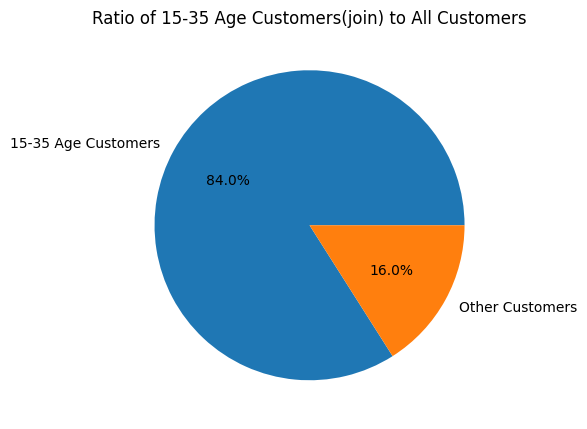

In [184]:
# 시각화
data = [age_join_15_35_ratio , 0.16 ]
labels = ['15-35 Age Customers', 'Other Customers']

plt.figure(figsize=(5,7))
plt.pie(data, labels = labels, autopct='%1.1f%%')
plt.title('Ratio of 15-35 Age Customers(join) to All Customers')
plt.show()

### 현재시점(15-35세 비율)

In [185]:
age_now_15_35 = customer_df[(customer_df['age_now'] >= 15) & (customer_df['age_now'] <= 35)]
age_now_15_35_cnt = len(age_now_15_35)
age_now_15_35_cnt
#현재시점 15세 이상 35세 이하인 고객 : 85703 명

85703

In [186]:
# 전체 고객 수
total_customer_cnt = customer_df['customer_id'].nunique()

age_now_15_35_ratio = np.round_(age_now_15_35_cnt / total_customer_cnt, decimals=2)

age_now_15_35_ratio

0.86

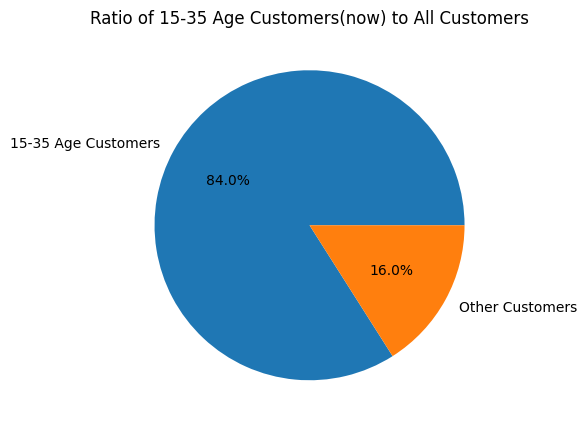

In [187]:
# 시각화
data = [age_join_15_35_ratio , 0.16 ]
labels = ['15-35 Age Customers', 'Other Customers']

plt.figure(figsize=(5,7))
plt.pie(data, labels = labels, autopct='%1.1f%%')
plt.title('Ratio of 15-35 Age Customers(now) to All Customers')
plt.show()

### 현재시점(세대별 비율)

In [188]:
# 현재(2022년) 기준으로 10대미만, 10대,20대,30대,40대,50대 이상으로 나눔
bins= [0, 10, 20, 30, 40, 50, np.inf]
labels = ['under10','10s','20s','30s','40s','over50']
customer_df['AgeGroup'] = pd.cut(customer_df['age_now'], bins=bins, labels=labels, right=False)


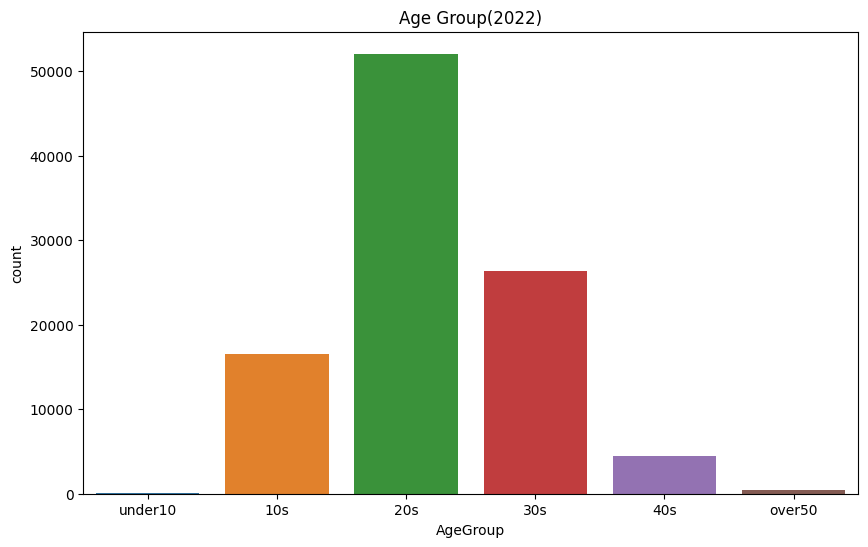

In [189]:
plt.figure(figsize=(10,6))
sns.countplot(data=customer_df, x='AgeGroup', order= ['under10','10s','20s','30s','40s','over50'])
plt.title('Age Group(2022)')
plt.show()


##나이(현재시점)에 따른 제품 구매 추이

In [190]:
# 나이(현재시점)에 따른 제품 구매 추이

# transation,customer 데이터를 'customer_id' 컬럼 기준으로 병합
trans_cust_df = pd.merge(transaction_df, customer_df, on='customer_id')

# 각 상품의 매출액 계산
trans_cust_df['sales'] = (trans_cust_df['item_price'] * trans_cust_df['quantity']- trans_cust_df['promo_amount'])

# 나이(출생연도)에 따른 매출액 및 판매횟수 총합 .
age_now_sales = trans_cust_df.groupby('age_now').agg({'sales': 'sum', 'customer_id': 'count'}).reset_index()
age_now_sales.rename(columns={'sales': 'total_sales', 'customer_id': 'sales_count'}, inplace=True)

age_now_sales

,age_now,total_sales,sales_count
0,6,41600516,136
1,7,50573949,152
2,8,88415251,279
3,9,155832099,489
4,10,548562296,1474
5,11,1288885259,3699
6,12,2132722276,5693
7,13,3623478469,9909
8,14,6285049061,16892
9,15,7235625591,19433


In [191]:
# 나이(현재시점)에 따른 제품 구매 추이

# transation,customer 데이터를 'customer_id' 컬럼 기준으로 병합
trans_cust_df = pd.merge(transaction_df, customer_df, on='customer_id')

# 각 상품의 매출액 계산
trans_cust_df['sales'] = (trans_cust_df['item_price'] * trans_cust_df['quantity']- trans_cust_df['promo_amount'])

# 나이에 따른 매출액 및 판매횟수 총합 .
age_now_sales = trans_cust_df.groupby('age_now').agg({'sales': 'sum', 'customer_id': 'count'}).reset_index()
age_now_sales.rename(columns={'sales': 'total_sales', 'customer_id': 'sales_count'}, inplace=True)

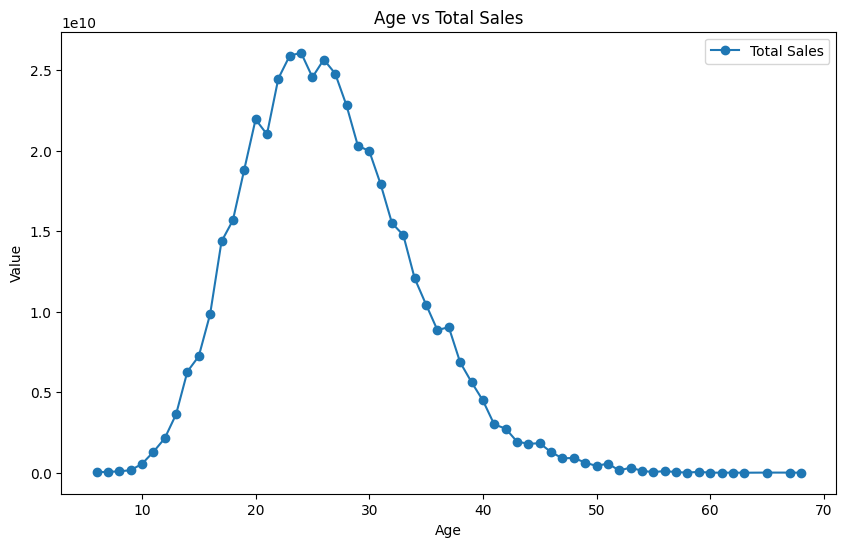

In [193]:
# 나이에 따른 총 구매액
plt.figure(figsize=(10, 6))

# 'total_sales' 그래프
plt.plot(age_now_sales['age_now'], age_now_sales['total_sales'], label='Total Sales', marker='o')

plt.xlabel('Age')
plt.ylabel('Value')
plt.title('Age vs Total Sales')
plt.legend()

plt.show()


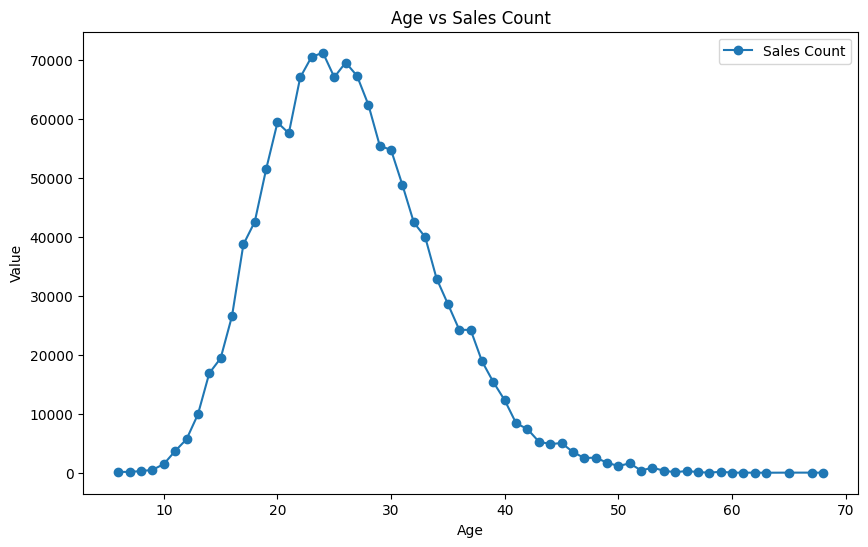

In [192]:
#나이에 따른 총 구매 횟수
# 'sales_count' 그래프
plt.figure(figsize=(10, 6))
plt.plot(age_now_sales['age_now'], age_now_sales['sales_count'], label='Sales Count', marker='o')
plt.xlabel('Age')
plt.ylabel('Value')
plt.title('Age vs Sales Count')
plt.legend()

plt.show()


##나이그룹(현재시점)에 따른 제품 구매 추이

In [194]:
# 'transaction_df'와 'customer_df' 머지
trans_cust_df = pd.merge(transaction_df, customer_df, on='customer_id')

# 각 상품의 매출액 계산
trans_cust_df['sales'] = (trans_cust_df['item_price'] * trans_cust_df['quantity'] - trans_cust_df['promo_amount'])

# 'AgeGroup'에 따른 매출액 및 판매횟수 총합 계산
agegroup_sales = trans_cust_df.groupby('AgeGroup').agg({'sales': 'sum', 'customer_id': 'count'}).reset_index()
agegroup_sales.rename(columns={'sales': 'total_sales', 'customer_id': 'sales_count'}, inplace=True)
agegroup_sales


,AgeGroup,total_sales,sales_count
0,under10,336421815,1056
1,10s,79826327429,216491
2,20s,237563475554,647979
3,30s,121079911767,330362
4,40s,19530947844,53591
5,over50,1851031737,5106


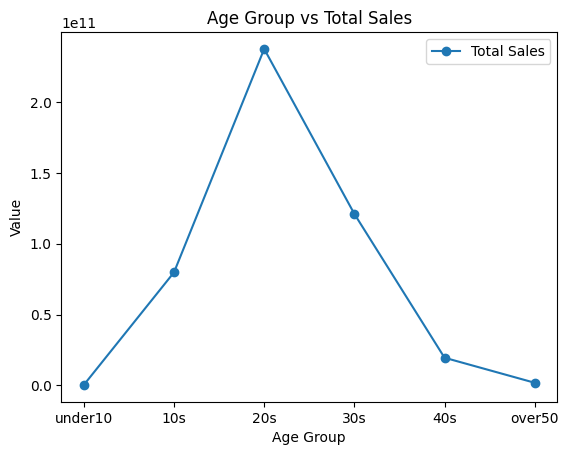

In [195]:
# 매출액(total_sales)와 판매 횟수(sales_count) 시각화
# 'total_sales' 그래프
plt.plot(agegroup_sales['AgeGroup'], agegroup_sales['total_sales'], label='Total Sales', marker='o')

plt.xlabel('Age Group')
plt.ylabel('Value')
plt.title('Age Group vs Total Sales')
plt.legend()

plt.show()


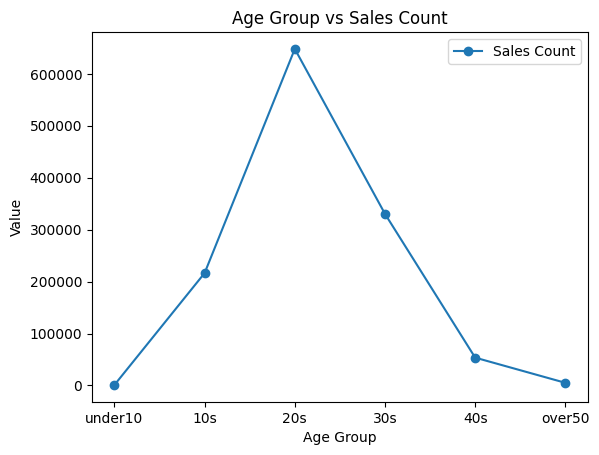

In [196]:
# 'sales_count' 그래프
plt.plot(agegroup_sales['AgeGroup'], agegroup_sales['sales_count'], label='Sales Count', marker='o')

plt.xlabel('Age Group')
plt.ylabel('Value')
plt.title('Age Group vs Sales Count')
plt.legend()

plt.show()

##age segmentation

### 총 매출,구매횟수,단가

In [210]:
# 연령 구간 설정

bins = [0, 14, 20, 25, 30, 35, float('inf')]
# float('inf')는 무한대를 의미하며, 이를 이용해 36세 이상을 모두 포함합니다.

# 각 연령 구간에 대한 레이블 설정
labels = ['non-target minor(0-14)', 'minor(15-20)', 'Early 20s(21-25)', 'Late 20s(26-30)', 'Early 30s(31-35)', 'non-target adults(36-)']

# cut 함수를 이용해 'age_group' 컬럼 생성
customer_df['age_segment'] = pd.cut(customer_df['age_now'], bins=bins, labels=labels)
customer_df['age_segment'].value_counts()

Early 20s(21-25)          26766
Late 20s(26-30)           24974
minor(15-20)              18325
Early 30s(31-35)          15638
non-target adults(36-)    11442
non-target minor(0-14)     2855
Name: age_segment, dtype: int64

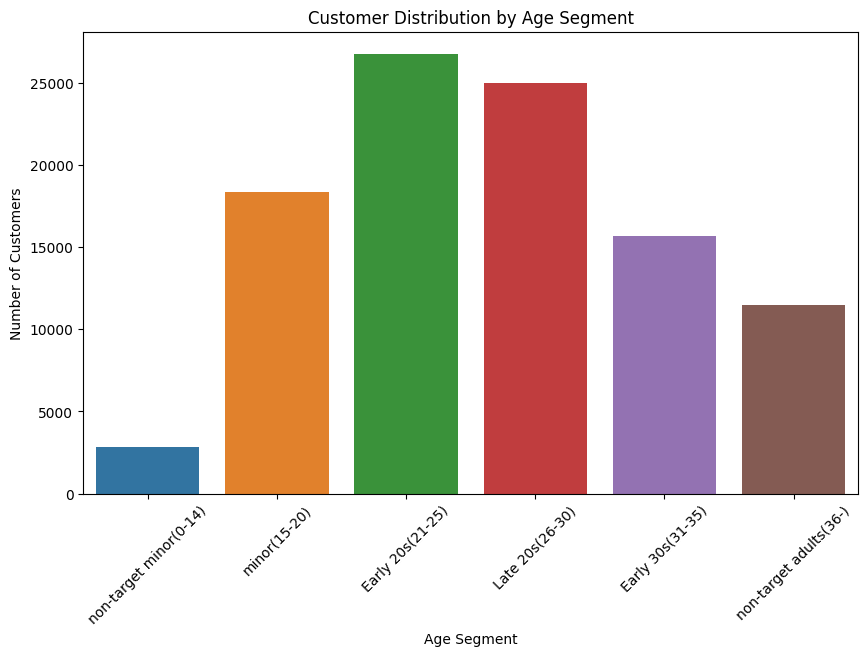

In [211]:
plt.figure(figsize=(10,6))
sns.countplot(data=customer_df, x='age_segment', order=labels)
plt.title('Customer Distribution by Age Segment')
plt.xlabel('Age Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [214]:
# 'transaction_df'와 'customer_df' 머지
trans_cust_df = pd.merge(transaction_df, customer_df, on='customer_id')

# 각 상품의 매출액 계산
trans_cust_df['sales'] = (trans_cust_df['item_price'] * trans_cust_df['quantity'] - trans_cust_df['promo_amount'])

# 'age_segment'에 따른 매출액 및 판매횟수 총합 계산
age_segment_sales = trans_cust_df.groupby('age_segment').agg({'sales': 'sum', 'customer_id': 'count'}).reset_index()
age_segment_sales.rename(columns={'sales': 'total_sales', 'customer_id': 'sales_count'}, inplace=True)
age_segment_sales['seg_transaction'] =  age_segment_sales['total_sales'] / age_segment_sales['sales_count']
age_segment_sales

,age_segment,total_sales,sales_count,seg_transaction
0,non-target minor(0-14),14215119176,38723,367097.57
1,minor(15-20),87893585977,238258,368900.88
2,Early 20s(21-25),122043092510,333633,365800.42
3,Late 20s(26-30),113559014027,309665,366715.69
4,Early 30s(31-35),70705108206,192831,366668.78
5,non-target adults(36-),51772196250,141475,365945.90


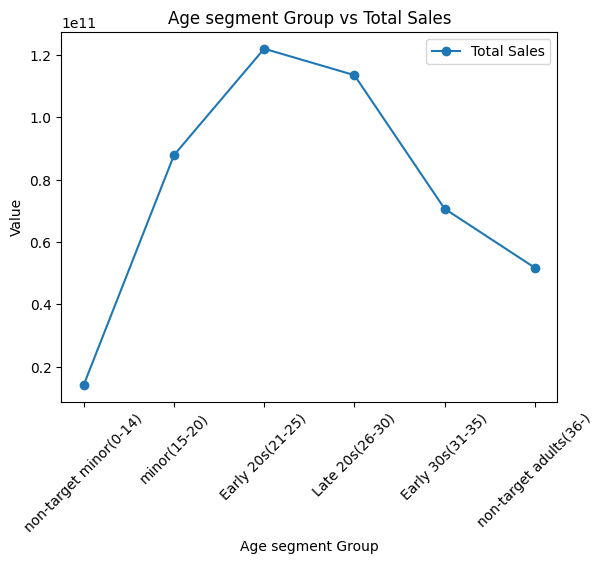

In [219]:
# 매출액(total_sales)와 판매 횟수(sales_count) 시각화
# 매출액 'total_sales' 그래프
plt.plot(age_segment_sales['age_segment'], age_segment_sales['total_sales'], label='Total Sales', marker='o')

plt.xlabel('Age segment Group')
plt.ylabel('Value')
plt.title('Age segment Group vs Total Sales')
plt.legend()
plt.xticks(rotation=45)

plt.show()


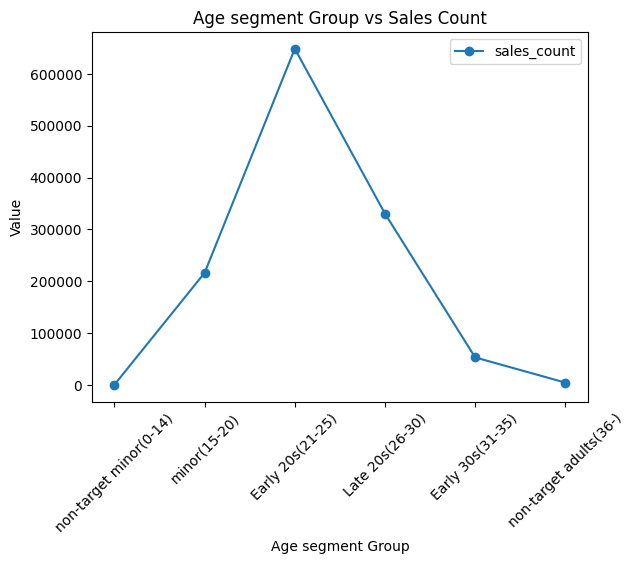

In [217]:
# 'sales_count' 그래프
plt.plot(age_segment_sales['age_segment'], agegroup_sales['sales_count'], label='sales_count', marker='o')

plt.xlabel('Age segment Group')
plt.ylabel('Value')
plt.title('Age segment Group vs Sales Count')
plt.legend()
plt.xticks(rotation=45)

plt.show()

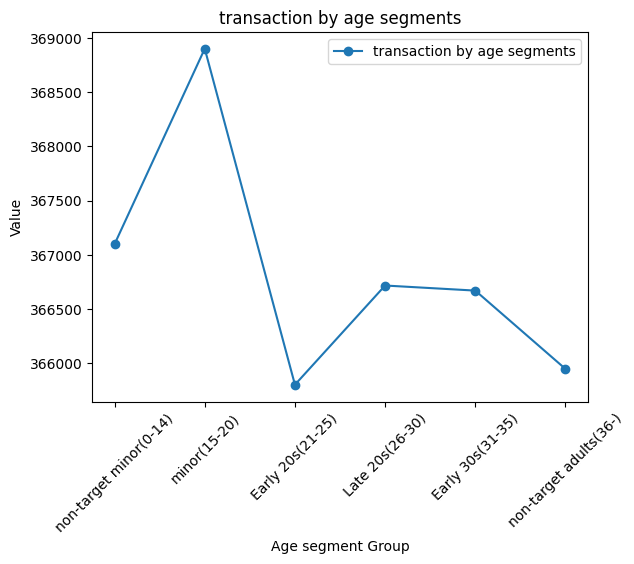

In [218]:
# age segment 에 따른 객단가 그래프

plt.plot(age_segment_sales['age_segment'], age_segment_sales['seg_transaction'], label='transaction by age segments', marker='o')

plt.xlabel('Age segment Group')
plt.ylabel('Value')
plt.title('transaction by age segments')
plt.legend()
plt.xticks(rotation=45)

plt.show()

In [244]:
from scipy.stats import f_oneway, kruskal
#21-25 그룹이 구매하는 제품의 평균가가 가장 낮긴 한데, 그 수준이 매우 미미함
#통계적으로 유의미한지 확인 => 별로 영향 없는 것으로.....ㅠㅠ

# ANOVA 테스트
fstat, pval = f_oneway(age_segment_sales[age_segment_sales['age_segment']=='non-target minor(0-14)']['seg_transaction'],
                        age_segment_sales[age_segment_sales['age_segment']=='minor(15-20)']['seg_transaction'],
                        age_segment_sales[age_segment_sales['age_segment']=='Early 20s(21-25)']['seg_transaction'],
                        age_segment_sales[age_segment_sales['age_segment']=='Late 20s(26-30)']['seg_transaction'],
                        age_segment_sales[age_segment_sales['age_segment']=='Early 30s(31-35)']['seg_transaction'],
                        age_segment_sales[age_segment_sales['age_segment']=='non-target adults(36-)']['seg_transaction'])
print("ANOVA p-value:", pval)

# Kruskal-Wallis H 테스트
hstat, pval = kruskal(age_segment_sales[age_segment_sales['age_segment']=='non-target minor(0-14)']['seg_transaction'],
                       age_segment_sales[age_segment_sales['age_segment']=='minor(15-20)']['seg_transaction'],
                       age_segment_sales[age_segment_sales['age_segment']=='Early 20s(21-25)']['seg_transaction'],
                       age_segment_sales[age_segment_sales['age_segment']=='Late 20s(26-30)']['seg_transaction'],
                       age_segment_sales[age_segment_sales['age_segment']=='Early 30s(31-35)']['seg_transaction'],
                       age_segment_sales[age_segment_sales['age_segment']=='non-target adults(36-)']['seg_transaction'])
print("Kruskal-Wallis p-value:", pval)


ANOVA p-value: nan
Kruskal-Wallis p-value: 0.4158801869955079


### 카테고리 분석

In [235]:
# 'customer_id'를 기준으로 'transaction_df'와 'customer_df' 머지
trans_segment_df = pd.merge(transaction_df, customer_df[['customer_id', 'age_segment']], on='customer_id', how='left')

# 'product_id'를 기준으로 'trans_segment_df'와 'product_df' 머지
trans_segment_df = pd.merge(trans_segment_df, product_df[['product_id', 'masterCategory', 'subCategory']], left_on='product_id', right_on='product_id', how='left')

# 가장 많이 구매한 'master_category' 계산
master_category_mode = trans_segment_df.groupby('age_segment')['masterCategory'].agg(lambda x: x.value_counts().index[0]).reset_index()

# 가장 많이 구매한 'sub_category' 계산
sub_category_mode = trans_segment_df.groupby('age_segment')['subCategory'].agg(lambda x: x.value_counts().index[0]).reset_index()

# 평균 제품 가격 계산
average_price = trans_segment_df.groupby('age_segment')['item_price'].mean().reset_index()

# 각 데이터프레임을 'age_segment'를 기준으로 합치기
result_df = pd.merge(master_category_mode, sub_category_mode, on='age_segment', how='left')
result_df = pd.merge(result_df, average_price, on='age_segment', how='left')
result_df

,age_segment,masterCategory,subCategory,item_price
0,non-target minor(0-14),Apparel,Topwear,249795.48
1,minor(15-20),Apparel,Topwear,250196.79
2,Early 20s(21-25),Apparel,Topwear,249751.12
3,Late 20s(26-30),Apparel,Topwear,249885.53
4,Early 30s(31-35),Apparel,Topwear,250238.05
5,non-target adults(36-),Apparel,Topwear,250010.91


In [236]:
result_df['item_price'].describe()


count        6.00
mean    249979.65
std        204.89
min     249751.12
25%     249817.99
50%     249948.22
75%     250150.32
max     250238.05
Name: item_price, dtype: float64

In [243]:
# 평균 구매 제품 금액
avg_price_all = 249979.65
# 'Early 20s'평균 구매 제품 금액
avg_price_early_20s = 249751.12

# 평균 구매 제품 금액 대비 'Early 20s' 그룹의 평균 구매 제품 금액이 얼마나 낮은지
diff_percent = ((avg_price_all - avg_price_early_20s) / avg_price_all) * 100

diff_percent

0.0914194415425411

### 구매유무(수정중)

In [266]:
#중복제거
trans = transaction_df[['session_id', 'customer_id']].drop_duplicates()
merged_data = pd.merge(customer_df, trans, on = 'customer_id' , how = 'left')

#구매내역이 있는 고객의 click stream 데이터
notnull_merge = merged_data[merged_data['customer_id'].notnull()].sort_values(['customer_id']).reset_index(drop = True)

#구매내역이 없는 고객의 click stream 데이터
isnull_merge = merged_data[merged_data['customer_id'].isnull()].sort_values(['customer_id']).reset_index(drop = True)

In [247]:
isnull_merge.head()


,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id
0,d2d37c4c-3c93-4377-af33-1f17833574b1,HOMEPAGE,2016-07-11T20:23:49.769692Z,3ac0c094-98cf-4713-a048-b2c1d7a24c0b,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,d2d37c4c-3c93-4377-af33-1f17833574b1,ITEM_DETAIL,2016-07-11T20:28:42.769692Z,691aab15-520b-4bfb-8f5c-457bf0c56698,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d2d37c4c-3c93-4377-af33-1f17833574b1,HOMEPAGE,2016-07-11T20:33:24.769692Z,a1efe67e-4d0a-4a10-a781-c39c548babaa,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,d2d37c4c-3c93-4377-af33-1f17833574b1,SCROLL,2016-07-11T20:38:33.769692Z,d72a27ba-2f7d-44f9-b98a-86813064c908,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d2d37c4c-3c93-4377-af33-1f17833574b1,ITEM_DETAIL,2016-07-11T20:43:05.769692Z,2987682f-3816-4bd1-85c6-c0494af4224a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
isnull_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         0 non-null      int64         
 1   first_name          0 non-null      object        
 2   last_name           0 non-null      object        
 3   username            0 non-null      object        
 4   email               0 non-null      object        
 5   gender              0 non-null      object        
 6   birthdate           0 non-null      datetime64[ns]
 7   device_type         0 non-null      object        
 8   device_id           0 non-null      object        
 9   device_version      0 non-null      object        
 10  home_location_lat   0 non-null      float64       
 11  home_location_long  0 non-null      float64       
 12  home_location       0 non-null      object        
 13  home_country        0 non-null      object        
 14  first_

In [249]:
isnull_merge.describe()

,product_id,quantity,item_price,promo_amount,customer_id
count,115.00,115.00,115.00,0.00,0.00
mean,28035.80,1.55,311764.35,NaN,NaN
std,16480.49,1.47,136424.94,NaN,NaN
min,2367.00,1.00,88773.00,NaN,NaN
25%,13358.50,1.00,216797.50,NaN,NaN
50%,26618.00,1.00,282464.00,NaN,NaN
75%,43621.00,1.00,389224.50,NaN,NaN
max,59046.00,9.00,822979.00,NaN,NaN


In [248]:
isnull_merge['product_id'].value_counts()

44774.00    2
7401.00     2
49581.00    1
47619.00    1
4048.00     1
25119.00    1
2367.00     1
45784.00    1
53872.00    1
50425.00    1
52575.00    1
2655.00     1
24482.00    1
8529.00     1
6669.00     1
22505.00    1
31983.00    1
57513.00    1
2988.00     1
21950.00    1
37261.00    1
2625.00     1
33117.00    1
47896.00    1
26618.00    1
46604.00    1
36220.00    1
22246.00    1
47336.00    1
9004.00     1
45785.00    1
18431.00    1
38452.00    1
54408.00    1
47385.00    1
15565.00    1
37408.00    1
12702.00    1
50168.00    1
10228.00    1
52616.00    1
43353.00    1
12900.00    1
56988.00    1
5894.00     1
56918.00    1
31168.00    1
41734.00    1
43889.00    1
17700.00    1
46824.00    1
4168.00     1
4272.00     1
14802.00    1
44462.00    1
19317.00    1
25113.00    1
17985.00    1
53918.00    1
34856.00    1
25582.00    1
31609.00    1
13066.00    1
21508.00    1
47335.00    1
6801.00     1
46610.00    1
12705.00    1
59046.00    1
22499.00    1
26651.00    1
34855.

In [263]:
trans_drop_duplicates = transaction_df.drop_duplicates(subset='customer_id')
trans_drop_duplicates.head()
# trans_drop_duplicates.info() => customer_id가 unique한 총 50705개 row추출
non_trans_customer = customer_df[~customer_df['customer_id'].isin(trans_drop_duplicates['customer_id'])]['customer_id']
non_trans_customer.sum()


2474389261

In [ ]:
# 미구매 고객이 어디까지 보고 나갔는지(행동)
# 가입했지만 미구매 고객의 인구통계적 특성